# Deciphering Employee Attrition: An Exploratory Data Analysis on HR Dataset

**Objective of the work:**  
The primary aim of this analysis is to uncover key insights into employee attrition and related factors within a fictional human resources dataset. By examining various features, we seek to answer critical questions such as the impact of business travel frequency on attrition, work-life balance for long-term employees, and more.

**Dataset Overview:**  
This dataset, provided by IBM and presented on a Kaggle competition, contains a total of 2795 observations (almost equally divided into test and train datasets) and 35 features. It is binary classification type dataset and aimed to predict whether an employee will stay in the company or not? The dataset encompass crucial aspects of employees' professional and personal lives, including factors like job satisfaction, work environment, and career progression.

# Imports and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns', None)

In [2]:
df1 = pd.read_csv('data/train.csv')
df1.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


# Data Exploration

## Observing the Data Types and general statistics

In [3]:
df1.shape

(1677, 35)

In [4]:
categorical_columns = df1.select_dtypes(include='object').columns
numerical_columns   = df1.select_dtypes(include='number').columns 

In [5]:
df1[categorical_columns].describe().T

,count,unique,top,freq
BusinessTravel,1677,3,Travel_Rarely,1290
Department,1677,3,Research & Development,1167
EducationField,1677,6,Life Sciences,775
Gender,1677,2,Male,1064
JobRole,1677,9,Sales Executive,355
MaritalStatus,1677,3,Married,773
Over18,1677,1,Y,1677
OverTime,1677,2,No,1277


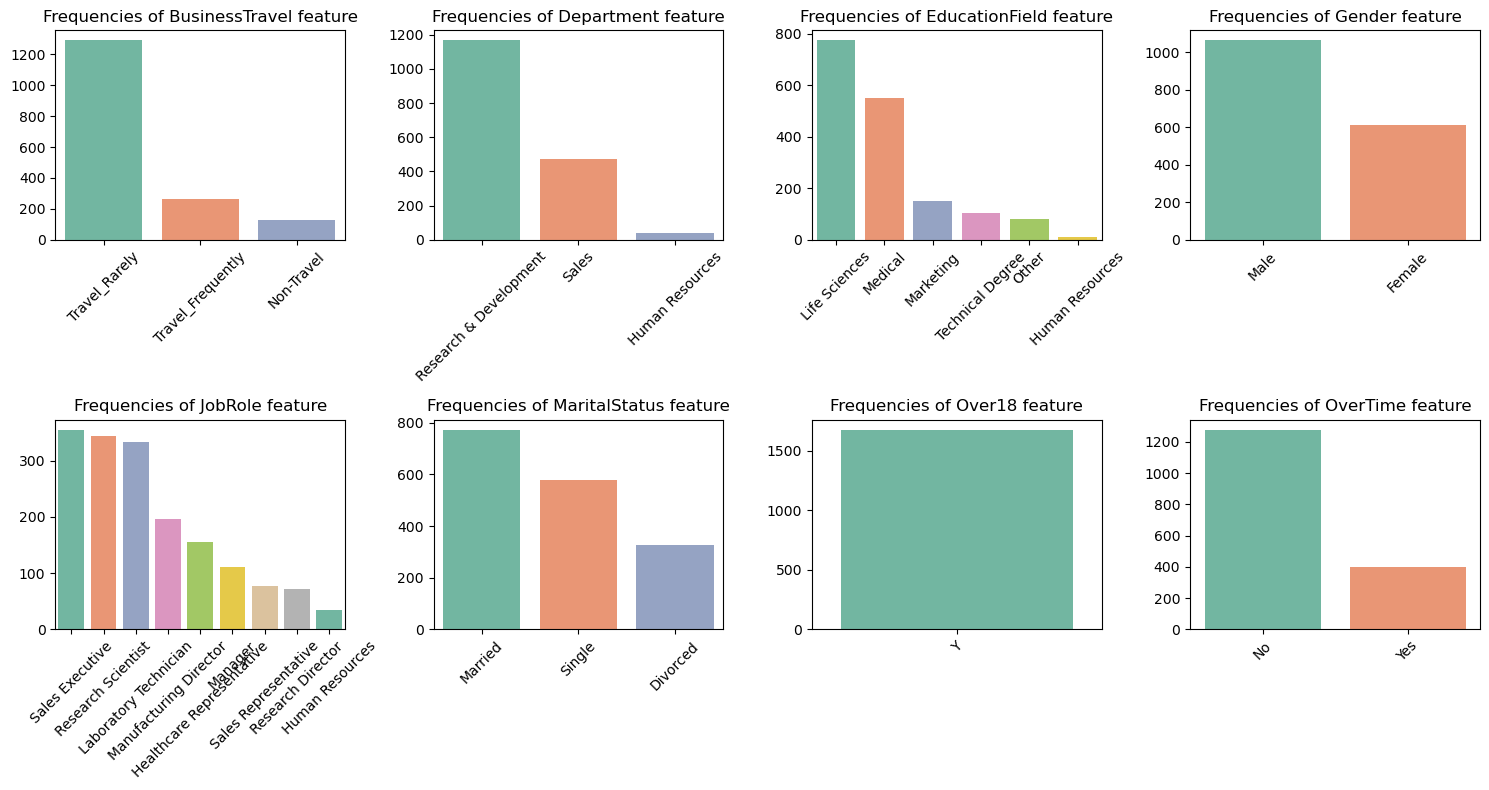

In [6]:
colors = sns.color_palette('Set2', len(categorical_columns))
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):
    col = categorical_columns[i]
    val_cnt = df1[col].value_counts()
    sns.barplot(x=val_cnt.index, y=val_cnt.values, ax=ax, palette=colors)
    ax.set_title(f"Frequencies of {col} feature")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


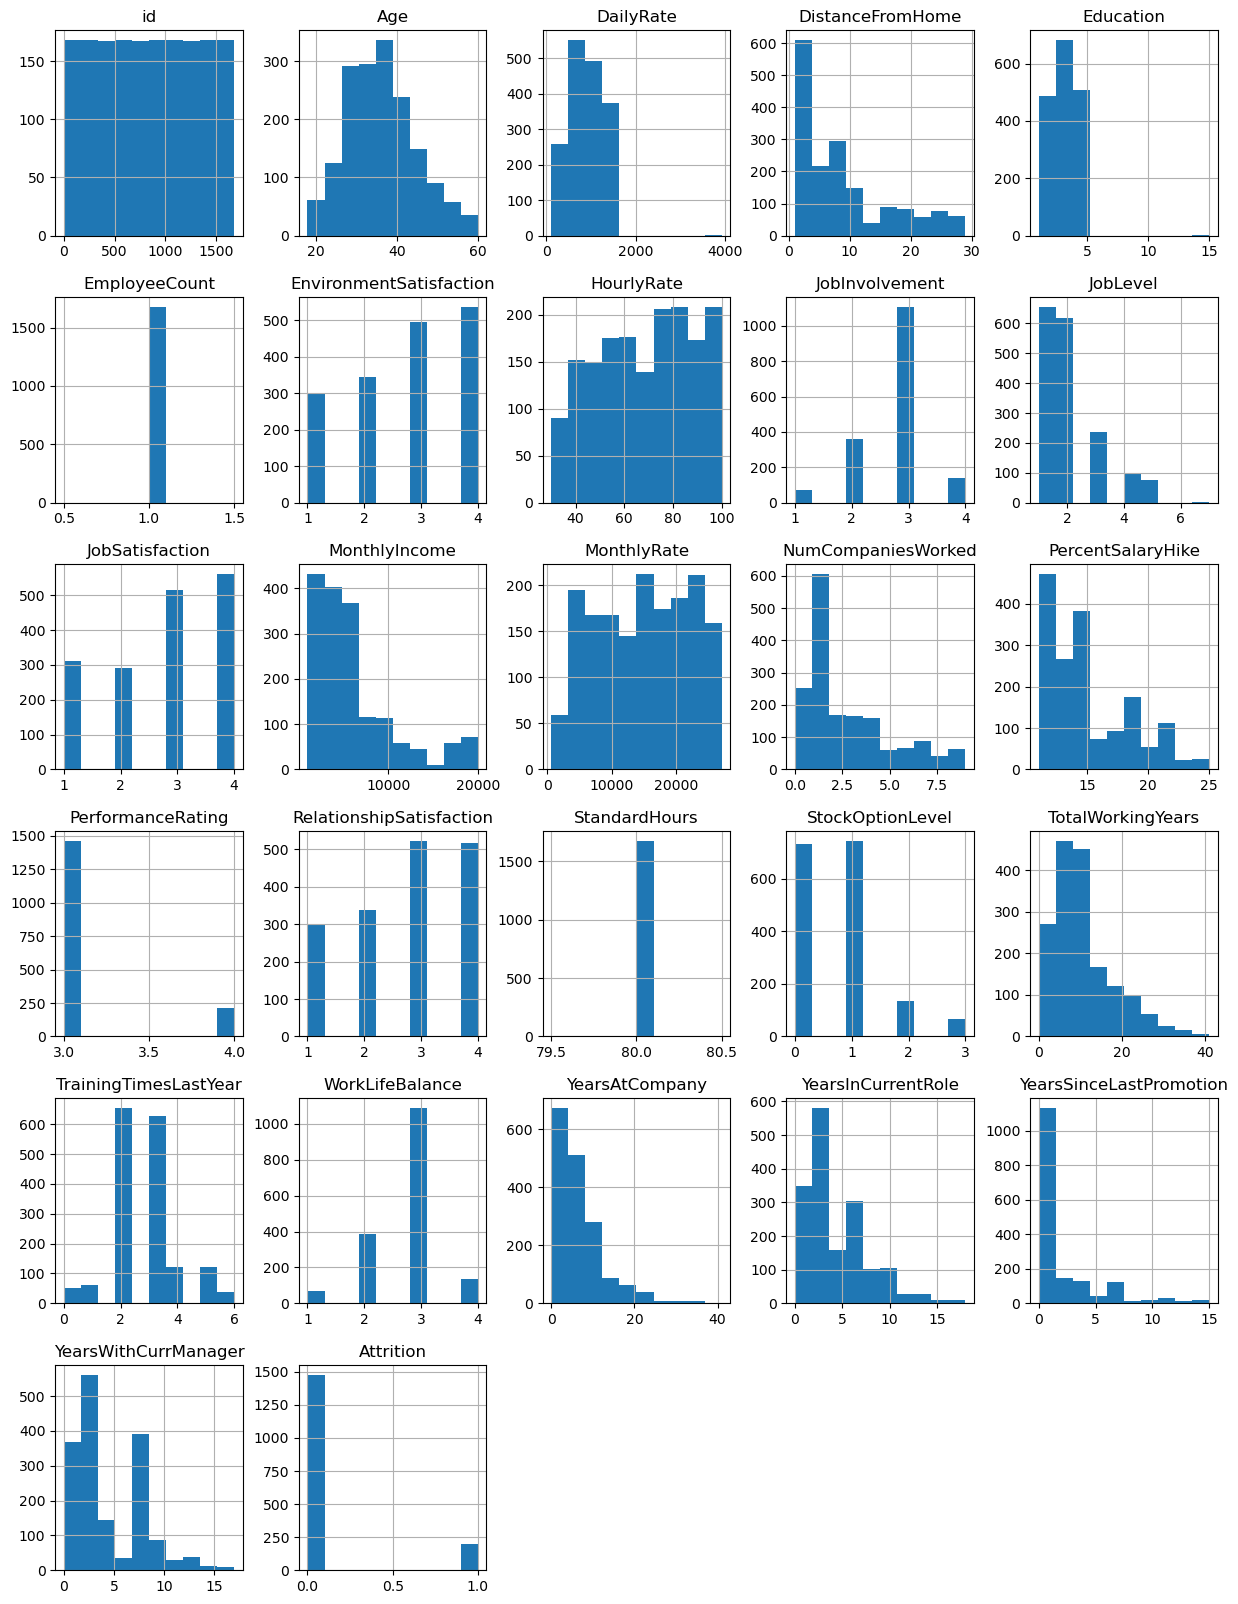

In [8]:
df1[numerical_columns].hist(figsize=(15,20))
plt.show()

## Observing Missing Values

In [9]:
df1.isnull().sum().nlargest(5)

id                0
Age               0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64

__Very clean dataset, there are no missing values__

## Observing the Outliers

In [10]:
from outliers import FatihOutliers

In [11]:
outlier_handler = FatihOutliers(df1)

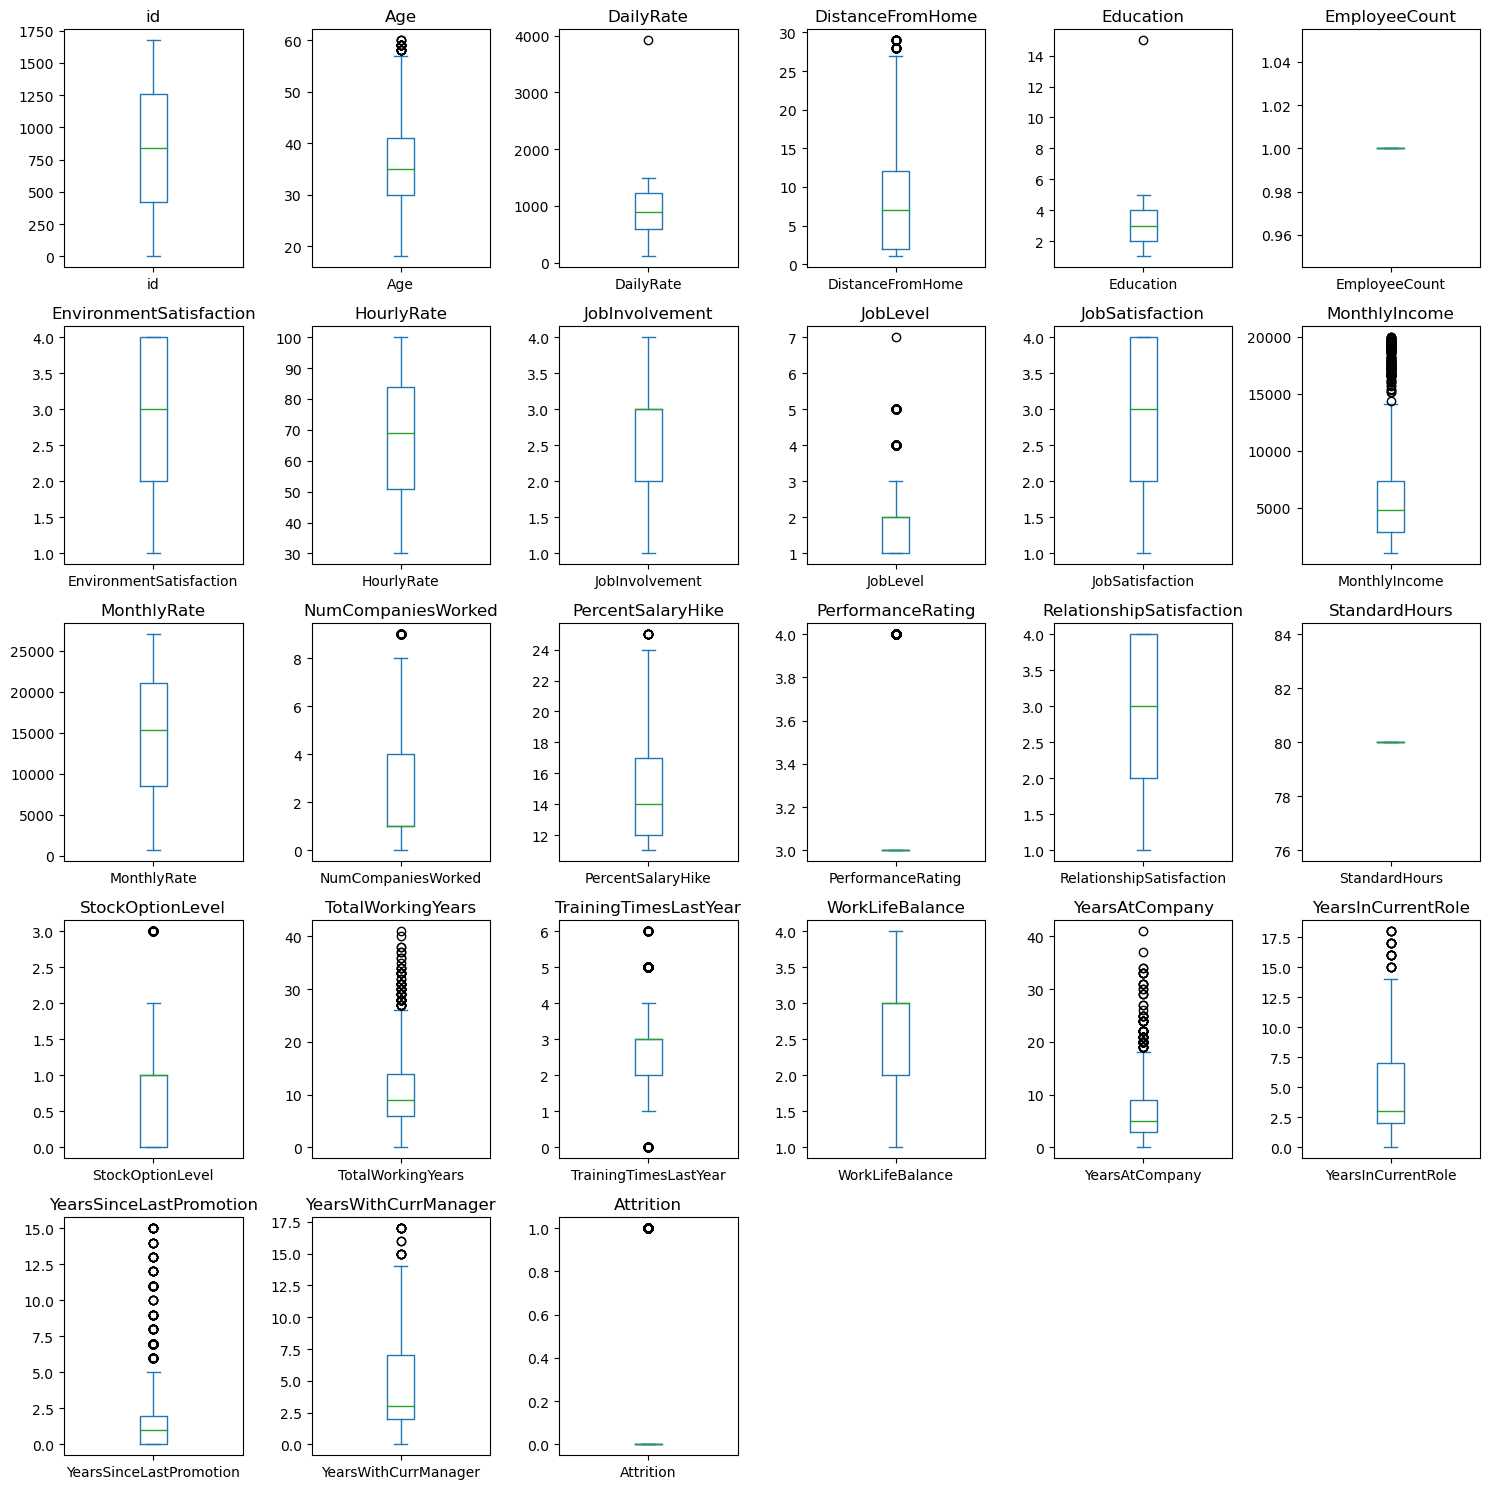

In [12]:
outlier_handler.plot_boxplots_for_all_numeric()

In [13]:
outliers_DailyRate = outlier_handler.show_outliers_for_features('DailyRate', IQR_multi=3)
outliers_DailyRate

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1398,1398,44,Travel_Frequently,3921,Research & Development,1,3,Life Sciences,1,4,Male,73,1,3,Healthcare Representative,4,Married,7336,7439,3,Y,No,12,3,2,80,1,24,3,3,20,10,3,10,0


In [14]:
outliers_Education = outlier_handler.show_outliers_for_features('Education', IQR_multi=3)
outliers_Education

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
527,527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,1,Female,72,3,1,Laboratory Technician,4,Divorced,2644,6217,7,Y,No,13,3,1,80,1,7,2,3,5,2,1,4,0


In [15]:
outliers_JobLevel = outlier_handler.show_outliers_for_features('JobLevel', IQR_multi=3)
outliers_JobLevel

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1535,1535,30,Travel_Rarely,583,Research & Development,6,3,Life Sciences,1,4,Female,100,3,7,Manufacturing Director,3,Single,5326,22490,3,Y,No,13,3,4,80,0,12,1,2,8,7,1,5,0


In [16]:
df1.shape

(1677, 35)

In [17]:
df1.drop(outliers_DailyRate.index, inplace=True)

In [18]:
df1.drop(outliers_Education.index, inplace=True)

In [19]:
df1.drop(outliers_JobLevel.index, inplace=True)

In [20]:
df1.shape

(1674, 35)

In [21]:
df2 = df1.copy()

# Dive Deep to Analysis

## High and Low Cardinality Check

In [22]:
df2['Over18'].nunique(), len(df2)

(1, 1674)

In [23]:
df2['id'].nunique(), len(df2)

(1674, 1674)

In [24]:
df2['EmployeeCount'].nunique(), len(df2)

(1, 1674)

In [25]:
df2['StandardHours'].nunique(), len(df2)

(1, 1674)

In [26]:
df2.shape

(1674, 35)

In [27]:
df2.drop(columns=['Over18', 'id', 'EmployeeCount', 'StandardHours' ], inplace=True)

In [28]:
df2.shape

(1674, 31)

In [29]:
df3 = df2.copy()

## Analyzing The Relationships

**Lets first Check the Relationship of the independent variables to dependent Variable Attrition**

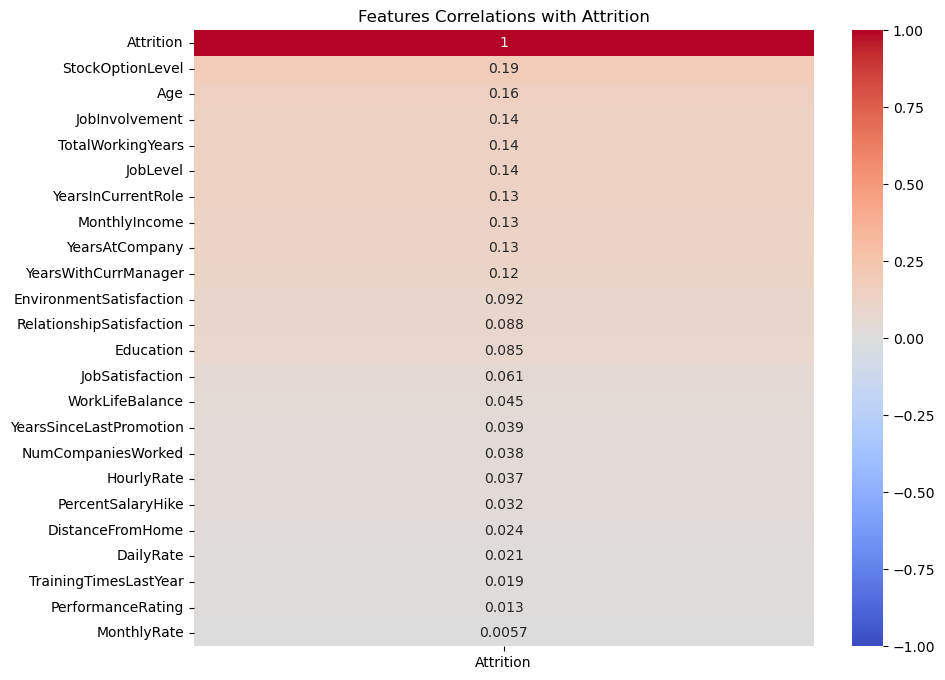

In [30]:
target_column = 'Attrition'
corr_matrix = df3.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

it seems like StockOptionLevel and Age are the most important features effecting Attrition comparing to other features  
Then JobInvolvement, JobLevel and totalWorkingYears come  
but still the correlations are not very high 

**Lets also check the correlations of independent variables**

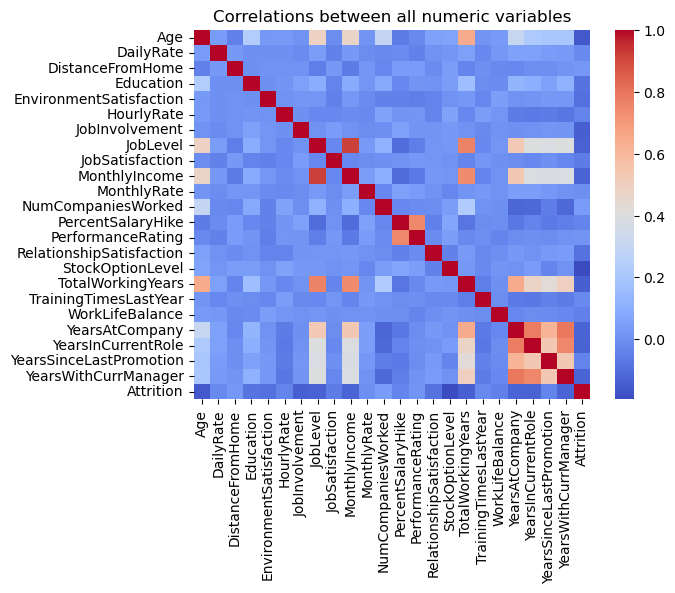

In [31]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlations between all numeric variables')
plt.show()

it seems like there are some sort of meaningful strong relationship between:  
* TotalWorkingYears, jobLevel, monthlyIncome, age 
* PercentSalaryHike and PerformanceRating
* YearsatCompany, YearswithcurrentRole, YearsinceLastPromotion, YearswithCurrentManage

In [32]:
df3['JobLevel'].value_counts()

1    654
2    617
3    234
4     94
5     75
Name: JobLevel, dtype: int64

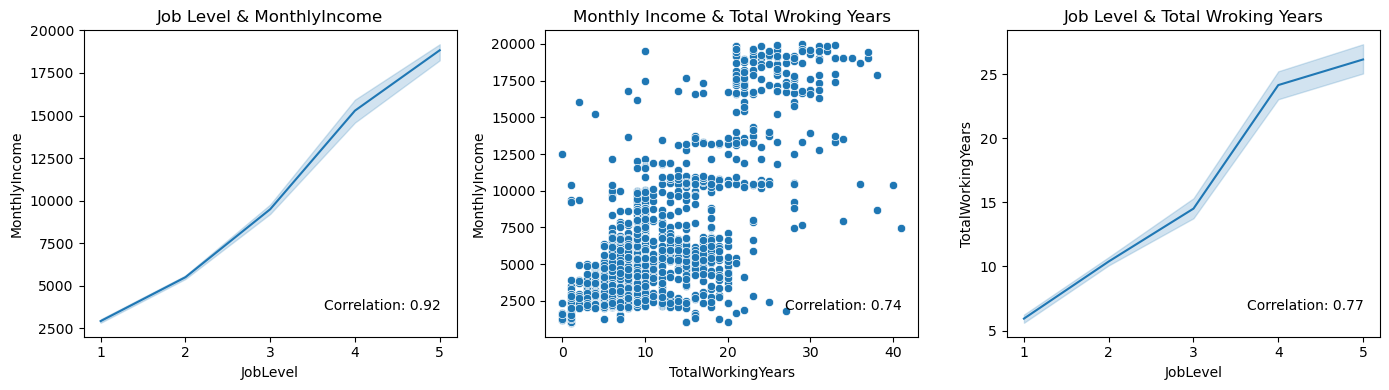

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(14,4))
axes.flatten()

sns.lineplot(x=df3['JobLevel'], y=df3['MonthlyIncome'] , ax=axes[0])
axes[0].set_title('Job Level & MonthlyIncome')
axes[0].text(0.8, 0.1, f"Correlation: {df3['JobLevel'].corr(df3['MonthlyIncome']):.2f}", ha='center', va='center', transform=axes[0].transAxes)

sns.scatterplot(y=df3['MonthlyIncome'], x=df3['TotalWorkingYears'] , ax=axes[1])
axes[1].set_title('Monthly Income & Total Wroking Years')
axes[1].text(0.8, 0.1, f"Correlation: {df3['MonthlyIncome'].corr(df3['TotalWorkingYears']):.2f}", ha='center', va='center', transform=axes[1].transAxes)

sns.lineplot(x=df3['JobLevel'], y=df3['TotalWorkingYears'] , ax=axes[2])
axes[2].set_title('Job Level & Total Wroking Years')
axes[2].text(0.8, 0.1, f"Correlation: {df3['JobLevel'].corr(df3['TotalWorkingYears']):.2f}", ha='center', va='center', transform=axes[2].transAxes)

plt.tight_layout()
plt.show()

Its seen that higher joblevel strongly means higher monthly income for the company  
Likewise, the more working years also result in higher JobLevels  
Also there is a strong relationship between Monthly Income and total working years in the compnay

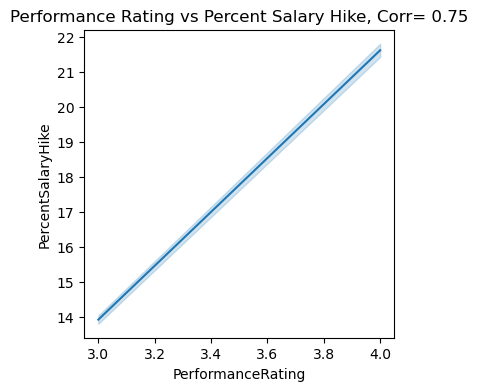

In [34]:
corr_coefficient_PR = df3['PerformanceRating'].corr(df3['PercentSalaryHike'])
plt.figure(figsize=(4, 4))
sns.lineplot(x='PerformanceRating', y='PercentSalaryHike', data=df3)
plt.title(f'Performance Rating vs Percent Salary Hike, Corr= {corr_coefficient_PR:.2f}')
plt.show()

As it was expected due to he nature of salaryhikes, the more performance rating means the more salary hikes, since there is a strong relationship in these features

## Checking The Distributions

Since we looked generally the distributions during the first observations, lets have a detailed eye on 'Age', 'DistancefromHome', 'MonthlyIncome' since we observed some skewness

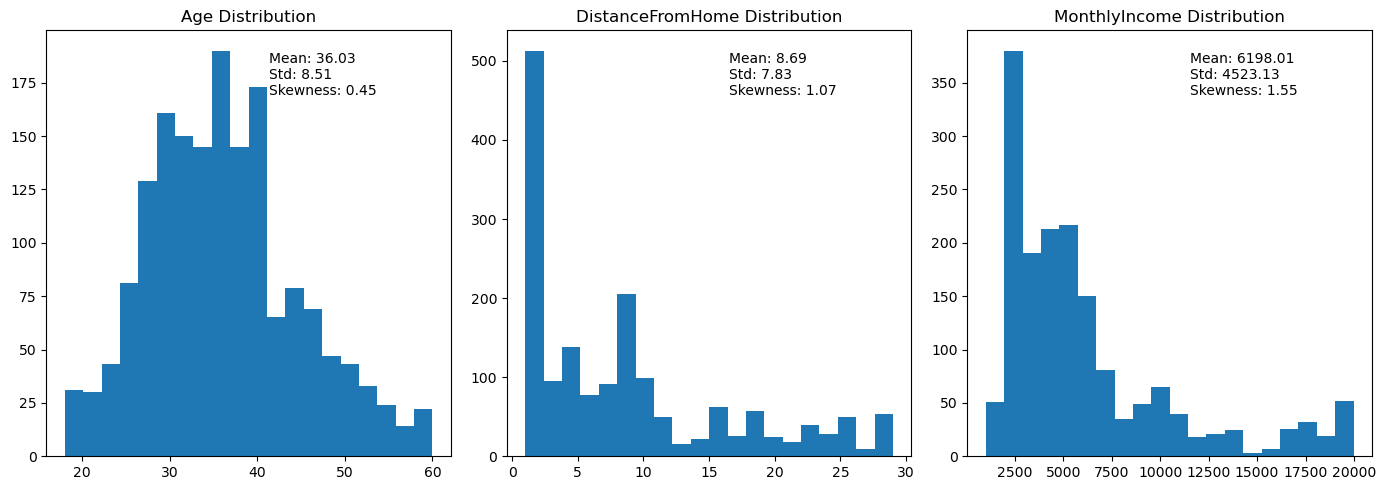

In [35]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
axes.flatten()

axes[0].hist(df3['Age'], bins=20)
axes[0].set_title('Age Distribution')
axes[0].text(0.55, 0.95, f"Mean: {df3['Age'].mean():.2f}\nStd: {df3['Age'].std():.2f}\nSkewness: {df3['Age'].skew():.2f}", transform=axes[0].transAxes, fontsize=10, verticalalignment='top')

axes[1].hist(df3['DistanceFromHome'], bins=20)
axes[1].set_title('DistanceFromHome Distribution')
axes[1].text(0.55, 0.95, f"Mean: {df3['DistanceFromHome'].mean():.2f}\nStd: {df3['DistanceFromHome'].std():.2f}\nSkewness: {df3['DistanceFromHome'].skew():.2f}", transform=axes[1].transAxes, fontsize=10, verticalalignment='top')

axes[2].hist(df3['MonthlyIncome'], bins=20)
axes[2].set_title('MonthlyIncome Distribution')
axes[2].text(0.55, 0.95, f"Mean: {df3['MonthlyIncome'].mean():.2f}\nStd: {df3['MonthlyIncome'].std():.2f}\nSkewness: {df3['MonthlyIncome'].skew():.2f}", transform=axes[2].transAxes, fontsize=10, verticalalignment='top')


plt.tight_layout()
plt.show()

* The majority of employees are between 30-40 years old, but the distribution is tailed moderately meaning that while the age is getting bigger number of employees are decreasing  

* The majority of the employees are living in 2 miles from work which excessively surpass all the other. So employees can be said that choose to live close to work or the compnay is hiring only the people who are living closeby to the workplace  

* The majority of the employees are making the basic level salary 

## Analyzing Attrition Classes: Categorical Variables

__NOTE: Job Attrition 1 means Employee Left The company__

In [36]:
df3['Attrition'].value_counts(normalize=True)

0    0.880526
1    0.119474
Name: Attrition, dtype: float64

We understand that %12 of the employees in the dataset, has left the company

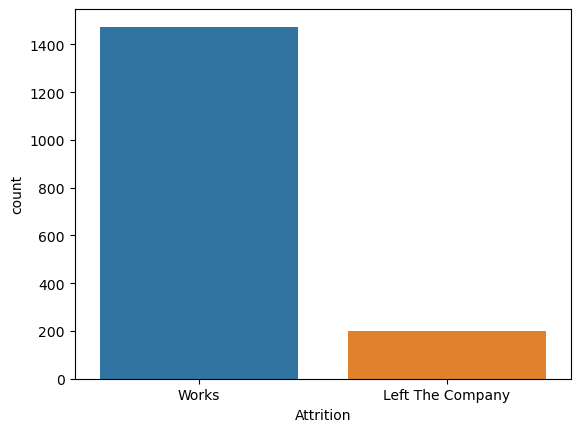

In [37]:
attrition_plot = df3['Attrition'].replace({1:'Left The Company', 0:'Works'})
sns.countplot(x=attrition_plot);

### Is there any effect of frequently traveling and job attrition?

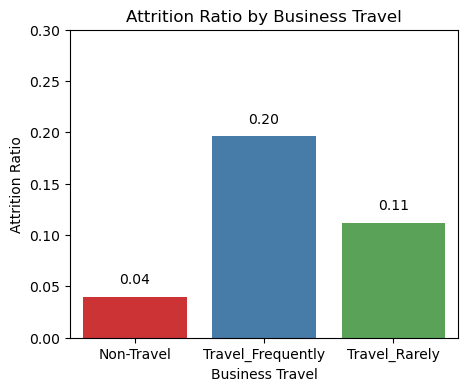

In [38]:
attrition_ratio_BT = df3.groupby('BusinessTravel')['Attrition'].mean()

# Visualize the attrition ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=attrition_ratio_BT.index, y=attrition_ratio_BT.values, palette='Set1')
plt.title('Attrition Ratio by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Attrition Ratio')
plt.ylim(0,0.3)

# Add labels for each bar
for i, ratio in enumerate(attrition_ratio_BT):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**I think we catched up a very important relation here. The employees who frequently travel are leaving the job 5 times higher than nontravel employees and almost 2 times higher than rare travelers** 

### Is Being Married Prevent job attrition?

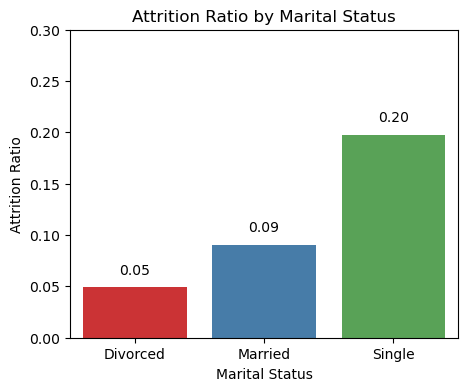

In [39]:
attrition_ratio_married = df3.groupby('MaritalStatus')['Attrition'].mean()

# Visualize the attrition ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=attrition_ratio_married.index, y=attrition_ratio_married.values, palette='Set1')
plt.title('Attrition Ratio by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Ratio')
plt.ylim(0,0.3)

# Add labels for each bar
for i, ratio in enumerate(attrition_ratio_married):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**Job Leaving rate is almost double for singles than married employees and 4 times higher than divorced ones**

### What about Gender and Attrition?

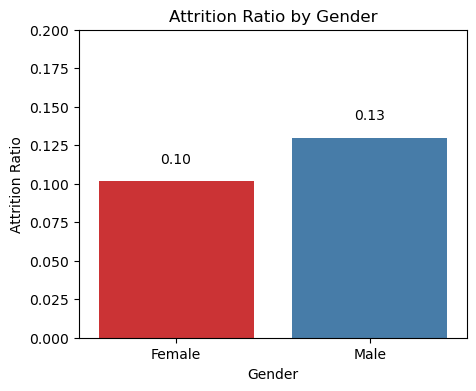

In [40]:
attrition_ratio_gender = df3.groupby('Gender')['Attrition'].mean()

# Visualize the attrition ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=attrition_ratio_gender.index, y=attrition_ratio_gender.values, palette='Set1')
plt.title('Attrition Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Ratio')
plt.ylim(0,0.2)

# Add labels for each bar
for i, ratio in enumerate(attrition_ratio_gender):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**It was observed the males are leving the job %30 more than the females**

### What is the effect of WorkLifeBalance to the job Attrition?

Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE, higher means better for employee  
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

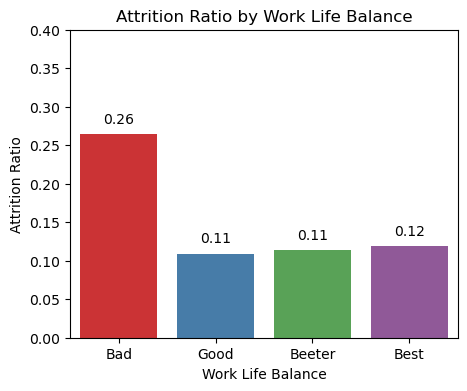

In [41]:
attrition_ratio_WLB = df3.groupby('WorkLifeBalance')['Attrition'].mean()
attrition_ratio_WLB.rename({1:'Bad', 2:'Good', 3:'Beeter', 4:'Best' }, inplace=True)

# Visualize the attrition ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=attrition_ratio_WLB.index, y=attrition_ratio_WLB.values, palette='Set1')
plt.title('Attrition Ratio by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Attrition Ratio')
plt.ylim(0,0.4)

# Add labels for each bar
for i, ratio in enumerate(attrition_ratio_WLB):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

**As expected, having a very low WorkLifeBalance significantly effects job Attrition**  
**On the other hand, once reached a certain level, it loses its effect on job leaving**

## Analyzing Attrition Classes: Numerical Variables

In [42]:
index_list_numeric = df3[df3['Attrition'] == 'Yes'].describe().T.index

In [43]:
df_comparison = pd.DataFrame(columns=['Count_Stayed', 'Count_Left', 'Mean_Stayed', 'Mean_Left'], index=index_list_numeric)
df_comparison['Count_Left'] = df3[df3['Attrition'] == 1].count()
df_comparison['Count_Stayed'] = df3[df3['Attrition'] == 0].count()
df_comparison['Mean_Left'] = df3[df3['Attrition'] == 1].mean()
df_comparison['Mean_Stayed'] = df3[df3['Attrition'] == 0].mean()

In [44]:
# Lets Add a mask to see some important differences
treshold_diff = 0.2   #if both class have %X (treshold) or higher difference than brings that statistics

df_comparison[abs(df_comparison['Mean_Stayed'] - df_comparison['Mean_Left']) >= treshold_diff * df_comparison['Mean_Stayed']]

,Count_Stayed,Count_Left,Mean_Stayed,Mean_Left
JobLevel,1474,200,2.050204,1.595
MonthlyIncome,1474,200,6409.708277,4637.795
StockOptionLevel,1474,200,0.776798,0.315
TotalWorkingYears,1474,200,11.073270,7.975
YearsAtCompany,1474,200,7.073948,4.775
YearsInCurrentRole,1474,200,4.316147,2.845
YearsWithCurrManager,1474,200,4.346676,2.975
Attrition,1474,200,0.000000,1.000


1. It is clearly seen that giving **more stock option** level highly decrease tje job leaving rate  
2. The employees who leave the company generally have spent significantly **less** years in company, current role and with current manager 

# Encoding

In [45]:
df3.shape

(1674, 31)

In [46]:
categorical_ordinal_variables = ['BusinessTravel']
categorical_nominal_variables = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numeric_variables = list(df3.select_dtypes(include='number').columns)

len(categorical_nominal_variables) + len(categorical_ordinal_variables) + len(numeric_variables)

31

In [47]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [48]:
df3.Department.value_counts()

Research & Development    1164
Sales                      471
Human Resources             39
Name: Department, dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Create transformers
categorical_ordinal_transformer = OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
categorical_nominal_transformer = OneHotEncoder(drop='first', sparse=False)

# Apply transformers
df4 = df3.copy()  # Make a copy to keep original DataFrame intact

# Apply OrdinalEncoder to ordinal variables
df4[categorical_ordinal_variables] = categorical_ordinal_transformer.fit_transform(df3[categorical_ordinal_variables])

# Apply OneHotEncoder to nominal variables
df4 = pd.get_dummies(df4, columns=categorical_nominal_variables, drop_first=True)

# Check the result
print(df4.shape)
df4.head()

(1674, 44)


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,36,2.0,599,24,3,4,42,3,1,4,2596,5099,1,13,3,2,1,10,2,3,10,0,7,8,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,35,1.0,921,8,3,1,46,3,1,1,2899,10778,1,17,3,4,1,4,3,3,4,2,0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
2,32,1.0,718,26,3,3,80,3,2,4,4627,16495,0,17,3,4,2,4,3,3,3,2,1,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,38,1.0,1488,2,3,3,40,3,2,1,5347,13384,3,14,3,3,0,15,1,1,6,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,50,1.0,1017,5,4,2,37,3,5,1,19033,19805,1,13,3,3,0,31,0,3,31,14,4,10,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1


# Handling Multi Collinearity

Actually, there are some features with obvious evidence of some sort of multi collinearity. But one important thing is there is also a trade-off between dropping these features (so losing their impact and descriptive power) and having exagarated effect on target variable by holding both.  

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df4 contains your preprocessed data
# Extract the features you want to check for multicollinearity
features = df4

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
sorted_vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(sorted_vif_data)

                              Feature         VIF
14                  PerformanceRating  176.576493
25  Department_Research & Development  163.642167
27       EducationField_Life Sciences   82.987135
26                   Department_Sales   77.397056
29             EducationField_Medical   59.717738
13                  PercentSalaryHike   46.471463
8                            JobLevel   42.260610
0                                 Age   36.404887
10                      MonthlyIncome   22.791103
7                      JobInvolvement   19.188108
19                    WorkLifeBalance   18.900001
28           EducationField_Marketing   17.825735
39            JobRole_Sales Executive   17.696160
17                  TotalWorkingYears   14.559824
6                          HourlyRate   13.443570
31    EducationField_Technical Degree   12.371434
20                     YearsAtCompany   11.854172
4                           Education   10.492850
30               EducationField_Other    9.748697


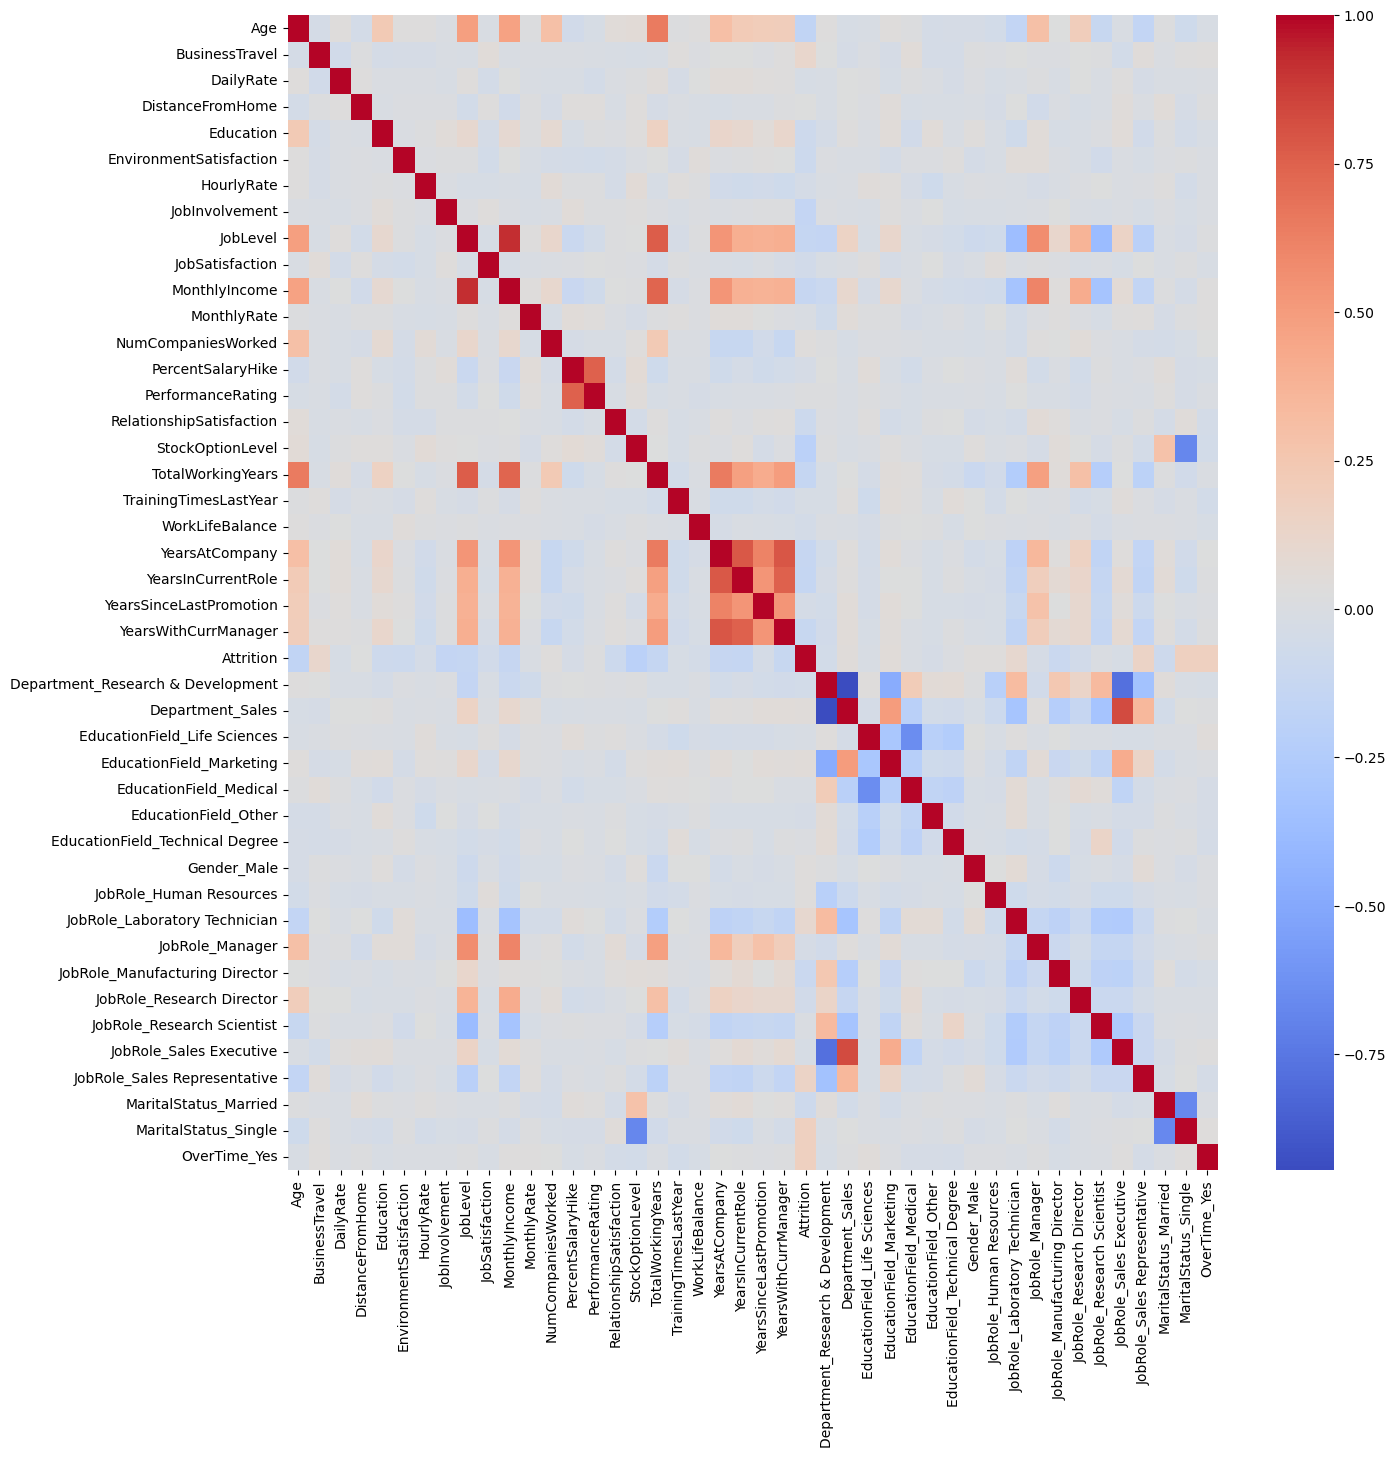

In [51]:
corr_matrix=df4.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm');

__This part of the Explarotary analysis is a thoroguh combination of all analysis above and also domain knowledge.__  
1. We need to infer more domain knowledge to have a better model to keep which features in dataset and which to drop
2. Above, we explored each independent variables correlation woth target variable. Higher correlation means more important feature so that better to hold
3. Also we looked to several features dependances among each other with variance inflation factor, higheer VIF means more dependant variables we have
4. We also checked several categorical features effects on Attrition classes and we discovered some important features, therefore its a good idea to hold these features in our model
5. Finally, we investigated our correlation matrix after encoding to see possible relations between the independant variables

__As a result:__  
* I will drop Department Features since this is also explaining in a degree by JobRole and some in Education Field 
* I will drop PerformanceRating over PercentSalaryhike, since they heavily dependant to each other, but Salaryhike is more descriptive
* I willdrop YearsInCurrentRole, YearsInCurrentRole, YearsSinceLastPromotion, YearsAtcompany, YearsWithCurrManager  over  TotalWorkingYears  
* I will drop JobLevel over MonthlyIncome

In [52]:
columns_to_drop = ['Department_Research & Development', 'Department_Sales', 'PerformanceRating', 
                   'YearsInCurrentRole', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsAtCompany', 'YearsWithCurrManager',
                   'JobLevel']

In [53]:
df5 = df4.drop(columns=columns_to_drop)

In [54]:
df5.shape

(1674, 36)

In [55]:
df5.sample(5)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Attrition,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1666,21,0.0,665,17,1,4,43,3,3,2028,19719,1,14,2,0,2,3,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
430,31,1.0,1401,26,3,1,93,3,4,3201,19921,4,20,4,1,6,1,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
258,28,1.0,783,1,3,1,62,3,2,3072,26767,1,18,3,1,10,3,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
72,26,2.0,1277,2,2,3,80,2,3,3875,25265,0,15,1,0,6,5,3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1002,29,1.0,1179,1,1,3,42,2,4,5769,13586,1,12,3,0,10,3,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1


# Conclusion

This exploratory data analysis delved into a comprehensive HR dataset to uncover insights into employee attrition. The dataset comprises 2795 observations with 35 features, each offering a glimpse into various aspects of employee professional and personal lives.

**Data Quality and Preprocessing:**  
The dataset exhibited high data quality, with **no missing values** requiring imputation. **Outliers** were detected and appropriately addressed in features like DailyRate, Education, and JobLevel. Additionally, **non-informative columns** (Over18, EmployeeCount, StandardHours, and ID) were excluded from the analysis.

**Attrition Dynamics:**  
Roughly 12% of employees in the dataset experienced attrition. This emphasizes the significance of understanding the underlying factors driving this trend.

**Feature Impact on Attrition:**  
Several features were identified as pivotal in influencing attrition. Notably, StockOptionLevel, Age, JobInvolvement, MonthlyIncome, and TotalWorkingYears emerged as the most impactful variables.

**Travel Frequency and Attrition:**  
An intriguing discovery was the substantial effect of **travel frequency** on attrition. Employees who traveled frequently exhibited a fivefold increase in attrition rates compared to non-travelers, and nearly twice as high as rare travelers.

**Marital Status and Attrition:**  
Marital status played a significant role in attrition dynamics. Single employees were twice as likely to leave their job compared to their married counterparts, and four times more likely than divorced employees.

**Gender Influence:**    
The gender factor also came into play, with male employees exhibiting a 30% higher attrition rate than their female counterparts.

**Work-Life Balance Impact:**  
As expected, employees with very low work-life balance ratings demonstrated a notably higher attrition rate. However, beyond a certain threshold, the impact on attrition diminished.

**Numeric Feature Insights:**  
High stock option levels correlated with lower attrition rates. Additionally, employees who left the company tended to have shorter tenures in their roles, at the company, and with their current managers.

**Categorical Variable Handling:**  
Categorical variables were effectively encoded using a combination of one-hot encoding for nominal features and label encoding for ordinal features like Business Travel Frequency.

**Multi-collinearity Mitigation:**
To mitigate multicollinearity issues, a careful assessment using Variance Inflation Factors (VIF) and correlation analyses was conducted. This resulted in the selection of features that contributed most meaningfully to the analysis, while avoiding redundancy.

In summary, this analysis provides a detailed understanding of the dynamics surrounding employee attrition. By identifying key influencing factors, we lay a strong foundation for subsequent modeling endeavors. This knowledge equips us to develop accurate and actionable predictive models that can help organizations address attrition challenges effectively.